## Modifying data and scaling the data for training and testing 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
df_combined = pd.read_csv('/content/drive/MyDrive/FYP/dataset/Merged Dataset/reddit_twitter_bitcoin_merged.csv')

In [ ]:
df_combined = df_combined.drop(columns=['polarity', 'subjectivity', 'open', 'high', 'low'])

In [ ]:
df_combined

In [ ]:
df_combined.set_index('timestamp', inplace=True)

In [ ]:
# Shift the "close" column 1 hour into the future and make it the target variable
df_combined["target"] = df_combined["close"].shift(-1)
df_combined = df_combined.iloc[:-1]

# Drop missing values
data = df_combined.dropna()

# Visualise the dataframe
df_combined

## Splitting data for training and testing 

In [ ]:
# Split into features and target
X = df_combined.drop('target', axis=1).values
y = df_combined['target'].values.reshape(-1, 1)

# Split into train, validation, and test sets
train_size = int(0.8 * len(X))
test_size = len(X) - train_size 
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Scale the data
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Reshape input to be 3D [samples, timesteps, features]
n_features = X.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, n_features))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, n_features))

In [ ]:
print(n_features)

## Loading twitter base model and making predictions for train and test

In [ ]:
# Load the five saved models
model_rnn_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_rnn.h5')
model_lstm_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_lstm.h5')
model_gru_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_gru.h5')
model_bilstm_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_bilstm.h5')
model_bigru_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_bigru.h5')

In [ ]:
# Generate predictions from the five models
preds_train_rnn = model_rnn_twitter.predict(X_train_reshaped)
preds_train_lstm = model_lstm_twitter.predict(X_train_reshaped)
preds_train_gru = model_gru_twitter.predict(X_train_reshaped)
preds_train_bilstm = model_bilstm_twitter.predict(X_train_reshaped)
preds_train_bigru = model_bigru_twitter.predict(X_train_reshaped)

# Stack the predictions into a single matrix
base_preds_train_twitter = np.column_stack((preds_train_rnn, preds_train_lstm, preds_train_gru, preds_train_bilstm, preds_train_bigru))

In [ ]:
# Generate predictions from the five models
preds_test_rnn = model_rnn_twitter.predict(X_test_reshaped)
preds_test_lstm = model_lstm_twitter.predict(X_test_reshaped)
preds_test_gru = model_gru_twitter.predict(X_test_reshaped)
preds_test_bilstm = model_bilstm_twitter.predict(X_test_reshaped)
preds_test_bigru = model_bigru_twitter.predict(X_test_reshaped)

# Stack the predictions into a single matrix
base_preds_test_twitter = np.column_stack((preds_test_rnn, preds_test_lstm, preds_test_gru, preds_test_bilstm, preds_test_bigru))

## Loading reddit base models and making predictions for train and test

In [ ]:
# Load the five saved models
model_rnn_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_rnn.h5')
model_lstm_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_lstm.h5')
model_gru_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_gru.h5')
model_bilstm_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_bilstm.h5')
model_bigru_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_bigru.h5')

In [ ]:
# Generate predictions from the five models
preds_train_rnn = model_rnn_reddit.predict(X_train_reshaped)
preds_train_lstm = model_lstm_reddit.predict(X_train_reshaped)
preds_train_gru = model_gru_reddit.predict(X_train_reshaped)
preds_train_bilstm = model_bilstm_reddit.predict(X_train_reshaped)
preds_train_bigru = model_bigru_reddit.predict(X_train_reshaped)

# Stack the predictions into a single matrix
base_preds_train_reddit = np.column_stack((preds_train_rnn, preds_train_lstm, preds_train_gru, preds_train_bilstm, preds_train_bigru))

In [ ]:
# Generate predictions from the five models
preds_test_rnn = model_rnn_reddit.predict(X_test_reshaped)
preds_test_lstm = model_lstm_reddit.predict(X_test_reshaped)
preds_test_gru = model_gru_reddit.predict(X_test_reshaped)
preds_test_bilstm = model_bilstm_reddit.predict(X_test_reshaped)
preds_test_bigru = model_bigru_reddit.predict(X_test_reshaped)

# Stack the predictions into a single matrix
base_preds_test_reddit = np.column_stack((preds_test_rnn, preds_test_lstm, preds_test_gru, preds_test_bilstm, preds_test_bigru))

## Loading meta models and making predictions for train and test 
The best performing meta models from the two platforms (reddit and twitter) were the linear regression models, so those are used to create the stacekd meta-ensemble final model.

In [ ]:
# Loading the reddit meta model
with open('/content/drive/MyDrive/FYP/ensemble_models/5_feature/reddit/lr_test_meta_model.pkl', 'rb') as f:
    reddit_model = pickle.load(f)

# Loading the twitter meta model
with open('/content/drive/MyDrive/FYP/ensemble_models/5_feature/twitter/lr_test_meta_model.pkl', 'rb') as f:
    twitter_model = pickle.load(f)

In [ ]:
reddit_train_preds = reddit_model.predict(base_preds_train_reddit)
twitter_train_preds = twitter_model.predict(base_preds_train_twitter)

# Combining both predictions as a numpy column
meta_model_train_preds = np.column_stack((reddit_train_preds, twitter_train_preds))

In [ ]:
reddit_test_preds = reddit_model.predict(base_preds_test_reddit)
twitter_test_preds = twitter_model.predict(base_preds_test_twitter)

# Combining both predictions as a numpy column
meta_model_test_preds = np.column_stack((reddit_test_preds, twitter_test_preds))

## The final meta ensemble training and testing
The regression models are fitted witht the valuse generated from the existing meta models to create the final meta ensemble model.

In [ ]:
def evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled):
    # Train the meta-model
    meta_model = final_meta_model
    meta_model.fit(meta_model_train_preds, y_train_scaled)

    # Generate predictions from the meta-model
    meta_model_test_preds = meta_model.predict(meta_model_test_preds)

    # Reshape the predictions to be two-dimensional
    meta_model_test_preds = meta_model_test_preds.reshape(-1, 1)

    # Inverse transforming the scaled data
    meta_model_test_preds_inv = scaler_y.inverse_transform(meta_model_test_preds)
    y_test_actual = scaler_y.inverse_transform(y_test_scaled)

    # Calculate the mean squared error, mean absolute error, and r2 score
    rmse = np.sqrt(mean_squared_error(y_test_actual, meta_model_test_preds_inv, squared=False))
    mae = mean_absolute_error(y_test_actual, meta_model_test_preds_inv)
    r2 = r2_score(y_test_actual, meta_model_test_preds_inv)

    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("Prediction of bitcoin closing price: ", meta_model_test_preds_inv)

### Linear regression

In [ ]:
final_meta_model = LinearRegression()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)


### Decision tree regression

In [ ]:
final_meta_model = DecisionTreeRegressor()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

### Random forest regression

In [ ]:
final_meta_model = RandomForestRegressor()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

### Elastic net regression

In [ ]:
final_meta_model = ElasticNet(alpha=0.015, l1_ratio=0.5, random_state=70)
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

RMSE: 50.5283
MAE: 2204.0325
R^2 Score: 0.8024
Prediction of bitcoin closing price:  [[55779.32 ]
 [55825.2  ]
 [55761.16 ]
 ...
 [46577.17 ]
 [46752.38 ]
 [46680.594]]


### Support vector regression

In [ ]:
final_meta_model = SVR()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

### Gradient boosting 

In [ ]:
final_meta_model = GradientBoostingRegressor()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

# Save the model object
with open('/content/drive/MyDrive/FYP/meta_ensembled_model/final_meta_model.pkl', 'wb') as f:
    pickle.dump(final_meta_model, f)

### Ada boosting 

In [ ]:
final_meta_model = AdaBoostRegressor()
evaluate_meta_model(final_meta_model, meta_model_train_preds, meta_model_test_preds, y_train_scaled, y_test_scaled)

# Making predictions using the meta-ensemble model

## Function to predict the close price using a csv file

In [ ]:
def predict_close_price(file_path):

  df = pd.read_csv(file_path)  

  # Save the time column
  times = df['timestamp']

  # Defining the features for the model
  features = ['pos', 'neg', 'neu', 'close', 'volume']

  # Keeping the features
  df = df[features]

  # Shift the "close" column 1 hour into the future and make it the target variable
  df["target"] = df["close"].shift(-1)
  df = df.iloc[:-1]
  
  # Drop missing values
  df = df.dropna()

  # Split into features and target
  X = df.drop('target', axis=1).values
  y = df['target'].values.reshape(-1, 1)

  # Scale the data
  scaler_X = MinMaxScaler()
  X = scaler_X.fit_transform(X)

  scaler_y = MinMaxScaler()
  y = scaler_y.fit_transform(y)

  # Reshape input to be 3D [samples, timesteps, features]
  n_features = X.shape[1]
  X = X.reshape((X.shape[0], 1, n_features))

  # Load the five saved base twitter models
  model_rnn_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_rnn.h5')
  model_lstm_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_lstm.h5')
  model_gru_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_gru.h5')
  model_bilstm_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_bilstm.h5')
  model_bigru_twitter = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/twitter_bigru.h5')

  # Load the five saved base reddit models
  model_rnn_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_rnn.h5')
  model_lstm_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_lstm.h5')
  model_gru_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_gru.h5')
  model_bilstm_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_bilstm.h5')
  model_bigru_reddit = load_model('/content/drive/MyDrive/FYP/rnn_base_models/5_features/reddit_bigru.h5')

  # Loading the reddit meta model
  with open('/content/drive/MyDrive/FYP/ensemble_models/5_feature/reddit/lr_test_meta_model.pkl', 'rb') as f:
      reddit_model = pickle.load(f)

  # Loading the twitter meta model
  with open('/content/drive/MyDrive/FYP/ensemble_models/5_feature/twitter/lr_test_meta_model.pkl', 'rb') as f:
      twitter_model = pickle.load(f)

  # Loading the meta-ensemble model 
  with open('/content/drive/MyDrive/FYP/meta_ensembled_model/final_meta_model.pkl', 'rb') as f:
    final_meta_ensemble_model = pickle.load(f)

  # Generate predictions from the five models
  preds_test_rnn = model_rnn_twitter.predict(X)
  preds_test_lstm = model_lstm_twitter.predict(X)
  preds_test_gru = model_gru_twitter.predict(X)
  preds_test_bilstm = model_bilstm_twitter.predict(X)
  preds_test_bigru = model_bigru_twitter.predict(X)

  # Stack the predictions into a single matrix
  base_preds_test_twitter = np.column_stack((preds_test_rnn, preds_test_lstm, preds_test_gru, preds_test_bilstm, preds_test_bigru))

  # Generate predictions from the five models
  preds_test_rnn = model_rnn_reddit.predict(X)
  preds_test_lstm = model_lstm_reddit.predict(X)
  preds_test_gru = model_gru_reddit.predict(X)
  preds_test_bilstm = model_bilstm_reddit.predict(X)
  preds_test_bigru = model_bigru_reddit.predict(X)

  # Stack the predictions into a single matrix
  base_preds_test_reddit = np.column_stack((preds_test_rnn, preds_test_lstm, preds_test_gru, preds_test_bilstm, preds_test_bigru))

  # Generate predictions using the ensemble models
  reddit_test_preds = reddit_model.predict(base_preds_test_reddit)
  twitter_test_preds = twitter_model.predict(base_preds_test_twitter)

  # Combining both predictions as a numpy column
  meta_model_test_preds = np.column_stack((reddit_test_preds, twitter_test_preds))

  # Generating the final predictions
  final_prediction = final_meta_ensemble_model.predict(meta_model_test_preds)
  final_prediction = final_prediction.reshape(-1, 1) # reshape to match input shape
  final_prediction = scaler_y.inverse_transform(final_prediction)

  # Create a DataFrame with the actual and predicted values
  actual_values = scaler_y.inverse_transform(y)
  actual_values = actual_values.reshape(-1, 1)

  # Combine predicted and actual values into a single dataframe with time column
  predictions_df = pd.DataFrame({'timestamp': times.iloc[-final_prediction.shape[0]:], 'actual': actual_values.flatten(), 'predicted': final_prediction.flatten()})


  # Create a line plot of the actual and predicted values
  fig, ax = plt.subplots(figsize=(18, 8)) 
  ax.plot(predictions_df['timestamp'], predictions_df['actual'], label='Actual')
  ax.plot(predictions_df['timestamp'], predictions_df['predicted'], label='Predicted')

  # Add axis labels and a title
  ax.set_xlabel('Time')
  ax.set_ylabel('Close Price')
  ax.set_title('Bitcoin Price Prediction')

  # Add a legend
  ax.legend()

  # Display the plot
  plt.show()

  return predictions_df

1/1 [==============================] - 1s 590ms/step


1/1 [==============================] - 1s 589ms/step


1/1 [==============================] - 0s 401ms/step


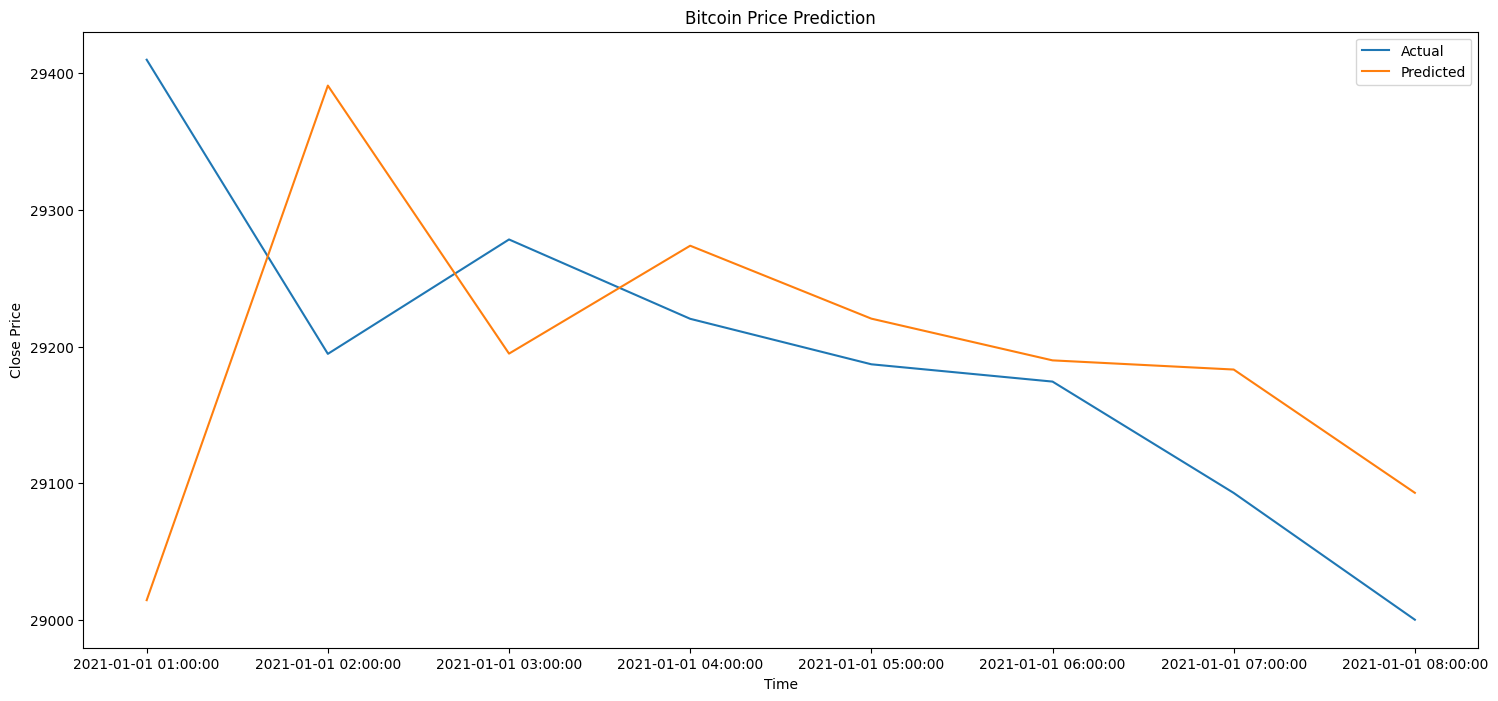


**********************************************
             timestamp    actual     predicted
1  2021-01-01 01:00:00  29409.99  29014.320503
2  2021-01-01 02:00:00  29194.65  29391.058964
3  2021-01-01 03:00:00  29278.40  29194.828045
4  2021-01-01 04:00:00  29220.31  29273.821631
5  2021-01-01 05:00:00  29187.01  29220.431080
6  2021-01-01 06:00:00  29174.35  29189.885673
7  2021-01-01 07:00:00  29092.83  29183.176157
8  2021-01-01 08:00:00  29000.01  29092.923646
**********************************************


In [ ]:
test_prediction = predict_close_price('/content/drive/MyDrive/FYP/dataset/test_data/reddit_twitter_bitcoin_merged_shrunk.csv')
print('')
print('**********************************************')
print(test_prediction)
print('**********************************************')
